In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


In [149]:
raw = pd.read_csv('../input/train.csv')

In [150]:
raw.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


In [151]:
raw.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [152]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [153]:
raw.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [154]:
raw['belongs_to_collection'].value_counts()

[{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}]                            16
[{'id': 9735, 'name': 'Friday the 13th Collection', 'poster_path': '/uobgqpLQff9WvxGKE2OSvXv1RHm.jpg', 'backdrop_path': '/c7pMKwv5NzIN6N3KM4L8fYMTtPw.jpg'}]                      7
[{'id': 937, 'name': 'The Pink Panther (Original) Collection', 'poster_path': '/xu6gZ0zGUSR8SC2QLKFaUrX2niM.jpg', 'backdrop_path': '/6KE7AguGR3UqwUn5RkzkoBc3MLy.jpg'}]           6
[{'id': 34055, 'name': 'Pokémon Collection', 'poster_path': '/j5te0YNZAMXDBnsqTUDKIBEt8iu.jpg', 'backdrop_path': '/iGoYKA0TFfgSoZpG2u5viTJMGfK.jpg'}]                             5
[{'id': 9338, 'name': 'Police Academy Collection', 'poster_path': '/1VRdXVy2FYlX4EtllnLKWK6kYDJ.jpg', 'backdrop_path': '/RhpI828r9EKPV4x0pyHiqCDZDQ.jpg'}]                        5
[{'id': 8650, 'name': 'Transformers Collection', 'poster_path': '/vOUPHWV8aGXq4yYQ2csje5LdT6g.jpg', 

In [155]:
cols_to_eval = ['belongs_to_collection', 'genres', 'production_companies','production_countries', 
                'spoken_languages', 'Keywords', 'cast', 'crew']

for i in cols_to_eval:
    raw[i] = raw[i].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [156]:
raw.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [157]:
raw['has_collection'] = raw['belongs_to_collection'].apply(lambda x: 1 if isinstance(x, list) else 0)

In [158]:
raw.has_collection.value_counts()

0    2396
1     604
Name: has_collection, dtype: int64

In [159]:
raw[pd.notnull(raw['belongs_to_collection'])]['belongs_to_collection']


0       [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1       [{'id': 107674, 'name': 'The Princess Diaries ...
8       [{'id': 256377, 'name': 'The Muppet Collection...
10      [{'id': 1575, 'name': 'Rocky Collection', 'pos...
11      [{'id': 48190, 'name': 'Revenge of the Nerds C...
13      [{'id': 91698, 'name': 'Chili Palmer Collectio...
19      [{'id': 9518, 'name': 'The Transporter Collect...
21      [{'id': 9735, 'name': 'Friday the 13th Collect...
22      [{'id': 207621, 'name': 'V/H/S Collection', 'p...
33      [{'id': 207632, 'name': 'The ABCs of Death Col...
34      [{'id': 90863, 'name': 'Rush Hour Collection',...
40      [{'id': 376970, 'name': 'Cocaine Cowboys', 'po...
46      [{'id': 8354, 'name': 'Ice Age Collection', 'p...
49      [{'id': 115570, 'name': 'Star Trek: The Next G...
57      [{'id': 120794, 'name': 'Batman Collection', '...
60      [{'id': 645, 'name': 'James Bond Collection', ...
63      [{'id': 9735, 'name': 'Friday the 13th Collect...
65      [{'id'

In [160]:
collection_counter = (('James Bond Collection', 16), ('Friday the 13th Collection', 7), 
('The Pink Panther (Original) Collection', 6), ('Police Academy Collection',5), ('Pokémon Collection',5),        
('Alien Collection',5), ('Transformers Collection', 4), ('Rambo Collection', 4), ('Ice Age Collection',4),               
('Paranormal Activity Collection',4), ('Resident Evil Collection', 4), ('Rocky Collection', 4), ("Child's Play Collection", 4),   
('The Fast and the Furious Collection', 4))

In [161]:
collection_names = raw.belongs_to_collection.apply(lambda x: x[0]['name'] if pd.notnull(x) else x).value_counts()[:116].index.values

In [162]:
for i in collection_names:
    raw[i] = raw.belongs_to_collection.apply(lambda x: 1 if pd.notnull(x) and x[0]['name'] == i else 0)

In [163]:
raw.drop(['belongs_to_collection'], axis=1, inplace=True)

In [164]:
raw.head(1)

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,James Bond Collection,Friday the 13th Collection,The Pink Panther (Original) Collection,Pokémon Collection,Police Academy Collection,Ice Age Collection,Alien Collection,Paranormal Activity Collection,Child's Play Collection,Resident Evil Collection,The Fast and the Furious Collection,Rocky Collection,Transformers Collection,Rambo Collection,The Dark Knight Collection,Halloween Collection,Missing in Action Collection,...,Ted Collection,The Expendables Collection,The Lord of the Rings Collection,Major League Collection,Species Collection,Dracula (Hammer Series),Final Destination Collection,Mad Max Collection,The Jack Ryan Collection,El pico - Colección,The Whole Nine/Ten Yards Collection,American Pie Collection,What the Bleep! Collection,Mall Cop Collection,The Twilight Collection,Saw Collection,Percy Jackson Collection,Dirty Harry Collection,Guardians of the Galaxy Collection,Ip Man Collection,Superman Collection,Would I Lie to You? Collection,Pet Sematary Collection,The Conjuring Collection,World of Watches Collection,Atlas Shrugged Collection,Urban Legend,The Chronicles of Narnia Collection,Daddy Day Camp Collection,48 Hrs. Collection,Hellraiser Collection,Kick-Ass Collection,Recep İvedik Serisi,Airport Collection,The Muppet Collection,V/H/S Collection,The Hangover Collection,The Hustler Collection,Star Wars Collection,Before... Collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [165]:
raw[raw['budget'] == 0]['genres'].apply(lambda x: x[0]['name'] if isinstance(x, 
                                list) else x).value_counts()

Drama              251
Comedy             200
Action              94
Documentary         56
Horror              31
Crime               30
Thriller            27
Adventure           22
Fantasy             19
Romance             17
Animation           17
Family              13
Mystery              9
Western              6
Music                6
War                  5
History              4
Science Fiction      2
Foreign              1
Name: genres, dtype: int64

In [166]:
[print(i) for i in raw[raw['budget'] == 0]['genres'].values]

[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 99, 'name': 'Documentary'}]
[{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10751, 'name': 'Family'}, {'id': 12, 'name': 'Adventure'}]
[{'id': 35, 'name': 'Comedy'}]
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'name': 'Horror'}]
[{'id': 53, 'name': 'Thriller'}, {'id': 9648, 'name': 'Mystery'}, {'id': 10769, 'name': 'Foreign'}]
[{'id': 27, 'name': 'Horror'}, {'id': 35, 'name': 'Comedy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'name': 'Horror'}, {'id': 9648, 'name': 'Mystery'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 9648, 'name': 'Mystery'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 27, 'name': 'Horror'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 53, 'name': 'Thriller'}]
[{'id': 28, 'name': 'Action'}, {'id': 99, 'name': 'Documentary'}]
[{'id':

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [167]:
raw[raw['budget'] != 0].describe()

,id,budget,popularity,runtime,revenue,has_collection,James Bond Collection,Friday the 13th Collection,The Pink Panther (Original) Collection,Pokémon Collection,Police Academy Collection,Ice Age Collection,Alien Collection,Paranormal Activity Collection,Child's Play Collection,Resident Evil Collection,The Fast and the Furious Collection,Rocky Collection,Transformers Collection,Rambo Collection,The Dark Knight Collection,Halloween Collection,Missing in Action Collection,Mexico Trilogy,The Wolverine Collection,Three Heroes Collection,Rush Hour Collection,Pirates of the Caribbean Collection,The Vengeance Collection,Star Trek: The Original Series Collection,Alex Cross Collection,The Jaws Collection,Planet of the Apes Original Collection,Indiana Jones Collection,[REC] Collection,Scary Movie Collection,Diary of a Wimpy Kid Collection,Cars Collection,Qatsi Collection,X-Men Collection,...,Ted Collection,The Expendables Collection,The Lord of the Rings Collection,Major League Collection,Species Collection,Dracula (Hammer Series),Final Destination Collection,Mad Max Collection,The Jack Ryan Collection,El pico - Colección,The Whole Nine/Ten Yards Collection,American Pie Collection,What the Bleep! Collection,Mall Cop Collection,The Twilight Collection,Saw Collection,Percy Jackson Collection,Dirty Harry Collection,Guardians of the Galaxy Collection,Ip Man Collection,Superman Collection,Would I Lie to You? Collection,Pet Sematary Collection,The Conjuring Collection,World of Watches Collection,Atlas Shrugged Collection,Urban Legend,The Chronicles of Narnia Collection,Daddy Day Camp Collection,48 Hrs. Collection,Hellraiser Collection,Kick-Ass Collection,Recep İvedik Serisi,Airport Collection,The Muppet Collection,V/H/S Collection,The Hangover Collection,The Hustler Collection,Star Wars Collection,Before... Collection
count,2188.000000,2.188000e+03,2188.000000,2187.000000,2.188000e+03,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.0,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,...,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.0,2188.000000,2188.000000,2188.0,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.0,2188.0,2188.000000,2188.000000,2188.000000,2188.000000
mean,1508.420475,3.089305e+07,9.700621,110.087791,8.696605e+07,0.227605,0.007313,0.003199,0.001371,0.000914,0.0,0.001828,0.001828,0.001828,0.001828,0.001828,0.001828,0.001828,0.001828,0.001828,0.001371,0.001371,0.000914,0.001371,0.001371,0.001371,0.001371,0.001371,0.000914,0.001371,0.001371,0.001371,0.001371,0.001371,0.000914,0.001371,0.001371,0.001371,0.000914,0.000914,...,0.000914,0.000914,0.000914,0.000457,0.000914,0.000457,0.000914,0.000914,0.000914,0.0,0.000914,0.000914,0.0,0.000914,0.000914,0.000914,0.000914,0.000457,0.000914,0.000914,0.000914,0.000914,0.000914,0.000914,0.000914,0.000914,0.000914,0.000914,0.000914,0.000914,0.000914,0.000914,0.000457,0.000914,0.0,0.0,0.000914,0.000914,0.000914,0.000914
std,863.873942,4.026785e+07,13.753541,22.443373,1.554912e+08,0.419382,0.085220,0.056484,0.037012,0.030227,0.0,0.042728,0.042728,0.042728,0.042728,0.042728,0.042728,0.042728,0.042728,0.042728,0.037012,0.037012,0.030227,0.037012,0.037012,0.037012,0.037012,0.037012,0.030227,0.037012,0.037012,0.037012,0.037012,0.037012,0.030227,0.037012,0.037012,0.037012,0.030227,0.030227,...,0.030227,0.030227,0.030227,0.021378,0.030227,0.021378,0.030227,0.030227,0.030227,0.0,0.030227,0.030227,0.0,0.030227,0.030227,0.03

In [168]:
raw.loc[raw['budget'] == 0,'budget'] = 3.089305e+07
raw.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,James Bond Collection,Friday the 13th Collection,The Pink Panther (Original) Collection,Pokémon Collection,Police Academy Collection,Ice Age Collection,Alien Collection,Paranormal Activity Collection,Child's Play Collection,Resident Evil Collection,The Fast and the Furious Collection,Rocky Collection,Transformers Collection,Rambo Collection,The Dark Knight Collection,Halloween Collection,Missing in Action Collection,...,Ted Collection,The Expendables Collection,The Lord of the Rings Collection,Major League Collection,Species Collection,Dracula (Hammer Series),Final Destination Collection,Mad Max Collection,The Jack Ryan Collection,El pico - Colección,The Whole Nine/Ten Yards Collection,American Pie Collection,What the Bleep! Collection,Mall Cop Collection,The Twilight Collection,Saw Collection,Percy Jackson Collection,Dirty Harry Collection,Guardians of the Galaxy Collection,Ip Man Collection,Superman Collection,Would I Lie to You? Collection,Pet Sematary Collection,The Conjuring Collection,World of Watches Collection,Atlas Shrugged Collection,Urban Legend,The Chronicles of Narnia Collection,Daddy Day Camp Collection,48 Hrs. Collection,Hellraiser Collection,Kick-Ass Collection,Recep İvedik Serisi,Airport Collection,The Muppet Collection,V/H/S Collection,The Hangover Collection,The Hustler Collection,Star Wars Collection,Before... Collection
0,1,14000000.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3300000.0,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1200000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_

In [169]:
raw['genres'] = raw['genres'].apply(lambda x: [i['name'] for i in x] 
                                            if isinstance(x,list) else [])
raw['genres_number'] = raw['genres'].apply(lambda x: len(x))
raw.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,James Bond Collection,Friday the 13th Collection,The Pink Panther (Original) Collection,Pokémon Collection,Police Academy Collection,Ice Age Collection,Alien Collection,Paranormal Activity Collection,Child's Play Collection,Resident Evil Collection,The Fast and the Furious Collection,Rocky Collection,Transformers Collection,Rambo Collection,The Dark Knight Collection,Halloween Collection,Missing in Action Collection,...,The Expendables Collection,The Lord of the Rings Collection,Major League Collection,Species Collection,Dracula (Hammer Series),Final Destination Collection,Mad Max Collection,The Jack Ryan Collection,El pico - Colección,The Whole Nine/Ten Yards Collection,American Pie Collection,What the Bleep! Collection,Mall Cop Collection,The Twilight Collection,Saw Collection,Percy Jackson Collection,Dirty Harry Collection,Guardians of the Galaxy Collection,Ip Man Collection,Superman Collection,Would I Lie to You? Collection,Pet Sematary Collection,The Conjuring Collection,World of Watches Collection,Atlas Shrugged Collection,Urban Legend,The Chronicles of Narnia Collection,Daddy Day Camp Collection,48 Hrs. Collection,Hellraiser Collection,Kick-Ass Collection,Recep İvedik Serisi,Airport Collection,The Muppet Collection,V/H/S Collection,The Hangover Collection,The Hustler Collection,Star Wars Collection,Before... Collection,genres_number
0,1,14000000.0,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,40000000.0,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,3,3300000.0,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1200000.0,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."

In [170]:
top_genres = [k for k,v in [('Drama', 1531), ('Comedy', 1028), ('Thriller', 789), ('Action', 741), ('Romance', 571), ('Crime', 469), ('Adventure', 439), ('Horror', 301), ('Science Fiction', 290), ('Family', 260), ('Fantasy', 232), ('Mystery', 225), ('Animation', 141), ('History', 132), ('Music', 
    100), ('War', 100), ('Documentary', 87), ('Western', 43)]]

In [171]:
top_genres

['Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Romance',
 'Crime',
 'Adventure',
 'Horror',
 'Science Fiction',
 'Family',
 'Fantasy',
 'Mystery',
 'Animation',
 'History',
 'Music',
 'War',
 'Documentary',
 'Western']

In [172]:
for i in top_genres:
    raw['genre_' + i] = raw['genres'].apply(lambda x: 1 if i in x else 0)

In [173]:
raw.drop(['genres'], axis=1, inplace=True)

In [174]:
raw[pd.notnull(raw['homepage'])]['homepage'].value_counts()

http://www.transformersmovie.com/                           4
http://www.lordoftherings.net/                              2
http://www.thehobbit.com/                                   2
http://www.jurassicpark.com/                                1
http://www.themechanicmovie.com/                            1
http://www.sonypictures.com/homevideo/firedup/              1
http://www.threestooges.com/movie/index.htm                 1
http://www.anotheryear-movie.com/                           1
https://www.facebook.com/Actionherobiju/                    1
http://www.coatwolf.com/                                    1
http://www.requiemforadream.com/                            1
http://www.speedracerthemovie.warnerbros.com/               1
http://www.thewrestlermovie.com/                            1
http://www.larrycrowne.com/                                 1
http://www.thebournelegacy.com/                             1
http://www.lesamoursimaginaires.com/                        1
http://s

In [175]:
raw['has_homepage'] = raw['homepage'].apply(lambda x: 1 if pd.notnull(x) else 0)
raw.drop(['homepage'],axis=1,inplace=True)

In [176]:
raw.drop(['original_title'],axis=1,inplace=True)

In [177]:
raw.drop(['status'],axis=1,inplace=True)

In [178]:
raw.head()

,id,budget,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,Keywords,cast,crew,revenue,has_collection,James Bond Collection,Friday the 13th Collection,The Pink Panther (Original) Collection,Pokémon Collection,Police Academy Collection,Ice Age Collection,Alien Collection,Paranormal Activity Collection,Child's Play Collection,Resident Evil Collection,The Fast and the Furious Collection,Rocky Collection,Transformers Collection,Rambo Collection,The Dark Knight Collection,Halloween Collection,Missing in Action Collection,Mexico Trilogy,The Wolverine Collection,Three Heroes Collection,Rush Hour Collection,...,Superman Collection,Would I Lie to You? Collection,Pet Sematary Collection,The Conjuring Collection,World of Watches Collection,Atlas Shrugged Collection,Urban Legend,The Chronicles of Narnia Collection,Daddy Day Camp Collection,48 Hrs. Collection,Hellraiser Collection,Kick-Ass Collection,Recep İvedik Serisi,Airport Collection,The Muppet Collection,V/H/S Collection,The Hangover Collection,The Hustler Collection,Star Wars Collection,Before... Collection,genres_number,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,has_homepage
0,1,14000000.0,tt2637294,en,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,40000000.0,tt0368933,en,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,3300000.0,tt2582802,en,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1200000.0,tt1821480,hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,30893050.0,tt1380152,ko,Marine Boy is the story of a former nationa

In [179]:
raw['release_date'] = raw['release_date'].apply(lambda x: x.split('/'))

In [180]:
raw['release_date'].head()

0     [2, 20, 15]
1      [8, 6, 04]
2    [10, 10, 14]
3      [3, 9, 12]
4      [2, 5, 09]
Name: release_date, dtype: object

In [181]:
raw['release_year'] = raw['release_date'].apply(lambda x: '19' + x[2] if int(x[2]) >= 20 else '20' + x[2]).astype(int)

In [182]:
raw['release_day'] = raw['release_date'].apply(lambda x: x[1]).astype(int)

In [183]:
raw['release_month'] = raw['release_date'].apply(lambda x: x[0]).astype(int)

In [184]:
raw['release_day_of_year'] = raw['release_day'] + (raw['release_month'] - 1) * 30

In [185]:
raw.head()

,id,budget,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,Keywords,cast,crew,revenue,has_collection,James Bond Collection,Friday the 13th Collection,The Pink Panther (Original) Collection,Pokémon Collection,Police Academy Collection,Ice Age Collection,Alien Collection,Paranormal Activity Collection,Child's Play Collection,Resident Evil Collection,The Fast and the Furious Collection,Rocky Collection,Transformers Collection,Rambo Collection,The Dark Knight Collection,Halloween Collection,Missing in Action Collection,Mexico Trilogy,The Wolverine Collection,Three Heroes Collection,Rush Hour Collection,...,World of Watches Collection,Atlas Shrugged Collection,Urban Legend,The Chronicles of Narnia Collection,Daddy Day Camp Collection,48 Hrs. Collection,Hellraiser Collection,Kick-Ass Collection,Recep İvedik Serisi,Airport Collection,The Muppet Collection,V/H/S Collection,The Hangover Collection,The Hustler Collection,Star Wars Collection,Before... Collection,genres_number,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,has_homepage,release_year,release_day,release_month,release_day_of_year
0,1,14000000.0,tt2637294,en,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[2, 20, 15]",93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,20,2,50
1,2,40000000.0,tt0368933,en,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[8, 6, 04]",113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2004,6,8,216
2,3,3300000.0,tt2582802,en,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[10, 10, 14]",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2014,10,10,280
3,4,1200000.0,tt1821480,hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]","[3, 9, 12]",122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2012,9,3,69
4,5,30893050.0,tt1380152,ko,Marine Boy is the story of a former nat

In [186]:
raw.drop(['release_date'], axis=1, inplace=True)

In [187]:
raw['production_companies'] = raw['production_companies'].apply(lambda x: [i['name'] for i in x] 
                                            if isinstance(x,list) else [])

In [188]:
raw['production_companies_number'] = raw['production_companies'].apply(lambda x: len(x))
raw.head()

,id,budget,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,runtime,spoken_languages,tagline,title,Keywords,cast,crew,revenue,has_collection,James Bond Collection,Friday the 13th Collection,The Pink Panther (Original) Collection,Pokémon Collection,Police Academy Collection,Ice Age Collection,Alien Collection,Paranormal Activity Collection,Child's Play Collection,Resident Evil Collection,The Fast and the Furious Collection,Rocky Collection,Transformers Collection,Rambo Collection,The Dark Knight Collection,Halloween Collection,Missing in Action Collection,Mexico Trilogy,The Wolverine Collection,Three Heroes Collection,Rush Hour Collection,Pirates of the Caribbean Collection,...,Atlas Shrugged Collection,Urban Legend,The Chronicles of Narnia Collection,Daddy Day Camp Collection,48 Hrs. Collection,Hellraiser Collection,Kick-Ass Collection,Recep İvedik Serisi,Airport Collection,The Muppet Collection,V/H/S Collection,The Hangover Collection,The Hustler Collection,Star Wars Collection,Before... Collection,genres_number,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,has_homepage,release_year,release_day,release_month,release_day_of_year,production_companies_number
0,1,14000000.0,tt2637294,en,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,20,2,50,3
1,2,40000000.0,tt0368933,en,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],"[{'iso_3166_1': 'US', 'name': 'United States o...",113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2004,6,8,216,1
2,3,3300000.0,tt2582802,en,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2014,10,10,280,3
3,4,1200000.0,tt1821480,hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2012,9,3,69,0
4,5,30893050.0,tt1380152,ko,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT

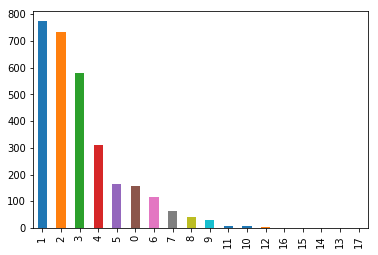

In [189]:
raw['production_companies_number'].value_counts().plot.bar()

In [190]:
all_companies = []

In [191]:
for i in raw['production_companies'].values:
    for j in i:
        all_companies.append(j)

In [192]:
# all_companies = set(all_companies)

In [193]:
top_companies = {company: all_companies.count(company) for company in set(all_companies)}


In [194]:
top_companies.items()

dict_items([('Animus Films', 1), ('Cliffjack Motion Pictures', 1), ('Apipoulaï', 1), ('120 Films', 1), ('Greek Film Center', 1), ('3B Productions', 1), ('KODA Entertainment', 1), ('International Film Corporation', 1), ('Linson Entertainment', 2), ('Kodansha', 3), ('Misher Films', 3), ('Miramax', 9), ('Parkes+MacDonald Image Nation', 4), ('MG Media', 1), ('Saturn Films', 9), ('Stonebridge Entertainment', 1), ('Kawoosh! Productions DTV I', 1), ('Bill Kenwright Films', 1), ('Happy Madison Productions', 13), ('Shooting Gallery', 1), ('Red Hawk Entertainment', 1), ('Triumph Films', 2), ('First Artists', 1), ('Family of the Year Productions', 1), ('Appaloosa Films', 1), ('Moonlighting Films', 2), ('Broadway Video', 2), ('Kouf/Bigelow Productions', 1), ('Filmfonds Wien', 2), ('Eros Entertainment', 1), ('8383 Productions', 2), ('Cofinova 10', 1), ('France 3 Cinema', 1), ('Smart Entertainment', 2), ('Starz Animation', 3), ('Metal Productions Inc.', 1), ('Saga Film', 3), ('Film Investment Piedmo

In [195]:
top_companies = sorted(top_companies.items(), key=lambda x: x[1], reverse=True)

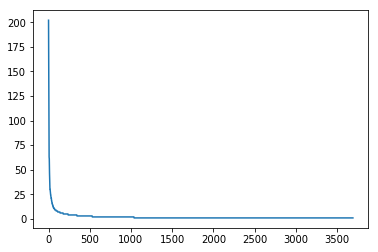

In [196]:
pd.Series([i[1] for i in top_companies]).plot.line()

In [197]:
top_companies = [i[0] for i in top_companies if i[1] >= 5]

In [198]:
raw['production_companies'][2]

['Bold Films', 'Blumhouse Productions', 'Right of Way Films']

In [199]:
for i in top_companies:
    raw['company_' + i] = raw['production_companies'].apply(lambda x: 1 if i in x else 0)

In [200]:
# list(filter(lambda x: x[1] >= 5, top_companies))

In [201]:
raw.head()

,id,budget,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,runtime,spoken_languages,tagline,title,Keywords,cast,crew,revenue,has_collection,James Bond Collection,Friday the 13th Collection,The Pink Panther (Original) Collection,Pokémon Collection,Police Academy Collection,Ice Age Collection,Alien Collection,Paranormal Activity Collection,Child's Play Collection,Resident Evil Collection,The Fast and the Furious Collection,Rocky Collection,Transformers Collection,Rambo Collection,The Dark Knight Collection,Halloween Collection,Missing in Action Collection,Mexico Trilogy,The Wolverine Collection,Three Heroes Collection,Rush Hour Collection,Pirates of the Caribbean Collection,...,company_The Ladd Company,company_Walt Disney Productions,company_Warner Bros. Animation,company_Protozoa Pictures,company_Ingenious Media,company_Thunder Road Pictures,company_CJ Entertainment,company_BIM Distribuzione,company_Brandywine Productions,company_Endgame Entertainment,company_Temple Hill Entertainment,company_Constantin Film,company_Alphaville Films,company_Rysher Entertainment,company_Flower Films (II),company_Mace Neufeld Productions,company_RatPac-Dune Entertainment,company_The Mirisch Corporation,company_Goldcrest Films International,company_Newmarket Capital Group,company_Troublemaker Studios,company_Cheyenne Enterprises,company_DreamWorks,company_The Australian Film Commission,company_Nelson Entertainment,company_France 3 Cinéma,company_Ghost House Pictures,company_Magnolia Pictures,company_Yari Film Group,company_Blinding Edge Pictures,company_Media Rights Capital,company_Cross Creek Pictures,company_The Saul Zaentz Company,company_Initial Entertainment Group (IEG),company_Roth Films,company_Centre National de la Cinématographie (CNC),company_Baltimore Pictures,company_Bel Air Entertainment,company_Nickelodeon Movies,company_Spring Creek Productions
0,1,14000000.0,tt2637294,en,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,40000000.0,tt0368933,en,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],"[{'iso_3166_1': 'US', 'name': 'United States o...",113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3300000.0,tt2582802,en,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1200000.0,tt1821480,hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0,"[{'iso

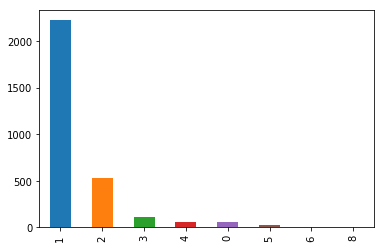

In [202]:
raw['production_countries'].apply(lambda x: len(x) if isinstance(x, list) else 0).value_counts().plot.bar()

In [206]:
from collections import Counter
raw['production_countries'] = raw['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
top_countries = [i[0] for i in Counter([i for j in list_of_countries for i in j]).most_common(25)]

In [207]:
raw['countries_number'] = raw['production_countries'].apply(lambda x: len(x) if isinstance(x, list) else 0)

for g in top_countries:
    raw['production_country_' + g] = raw['production_countries'].apply(lambda x: 1 if g in x else 0)

In [209]:
raw.drop(['production_countries'], axis=1, inplace=True)

In [210]:
raw.head()

,id,budget,imdb_id,original_language,overview,popularity,poster_path,production_companies,runtime,spoken_languages,tagline,title,Keywords,cast,crew,revenue,has_collection,James Bond Collection,Friday the 13th Collection,The Pink Panther (Original) Collection,Pokémon Collection,Police Academy Collection,Ice Age Collection,Alien Collection,Paranormal Activity Collection,Child's Play Collection,Resident Evil Collection,The Fast and the Furious Collection,Rocky Collection,Transformers Collection,Rambo Collection,The Dark Knight Collection,Halloween Collection,Missing in Action Collection,Mexico Trilogy,The Wolverine Collection,Three Heroes Collection,Rush Hour Collection,Pirates of the Caribbean Collection,The Vengeance Collection,...,company_Ghost House Pictures,company_Magnolia Pictures,company_Yari Film Group,company_Blinding Edge Pictures,company_Media Rights Capital,company_Cross Creek Pictures,company_The Saul Zaentz Company,company_Initial Entertainment Group (IEG),company_Roth Films,company_Centre National de la Cinématographie (CNC),company_Baltimore Pictures,company_Bel Air Entertainment,company_Nickelodeon Movies,company_Spring Creek Productions,countries_number,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa
0,1,14000000.0,tt2637294,en,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,40000000.0,tt0368933,en,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3300000.0,tt2582802,en,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1200000.0,tt1821480,hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",